In [122]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [48]:
df = pd.read_csv("data/poland-data-2009.csv", index_col=0)
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.348,-28.982,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.16396,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.19,3.5716,5.95,0
3,0.000595,0.22612,0.48839,3.1599,84.874,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.0076387,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,0
4,0.024526,0.43236,0.27546,1.7833,-10.105,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.9516,0.142980,4.2286,5.0528,98.783,3.695,3.4844,0
5,0.188290,0.41504,0.34231,1.9279,-58.274,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.17648,0.321880,0.82635,0.073039,2.5912,7.0756,100.54,3.6303,4.6375,0


In [49]:
# Inspect DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10503 entries, 1 to 10503
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10503 non-null  object 
 4   Attr5   10503 non-null  object 
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10503 non-null  object 
 8   Attr9   10503 non-null  object 
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10503 non-null  object 
 12  Attr13  10503 non-null  object 
 13  Attr14  10503 non-null  float64
 14  Attr15  10503 non-null  object 
 15  Attr16  10503 non-null  object 
 16  Attr17  10503 non-null  object 
 17  Attr18  10503 non-null  float64
 18  Attr19  10503 non-null  object 
 19  Attr20  10503 non-null  object 
 20  Attr21  10503 non-null  object 
 21  Attr22  10503 non-null  float64
 22

In [57]:
df = df[df != "?"].astype("float")
df["class"] = df["class"].astype("int")

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10503 entries, 1 to 10503
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

Let's take a look at how many firms are bankrupt, and how many are not. 0 represents Negative class, and 1 represents Positive class.

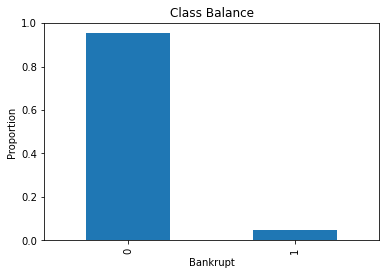

In [76]:
# Plot class balance
df["class"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Bankrupt",
    ylabel="Proportion",
    title="Class Balance"
);

Let's explore three different features to examine the imbalance

In [86]:
df.describe(include=np.float)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,10503.000000,10503.000000,10503.000000,10485.000000,1.047800e+04,10503.000000,10503.000000,10489.000000,10500.000000,10503.000000,...,1.050300e+04,10460.000000,10503.000000,10474.000000,10503.000000,9.911000e+03,10486.000000,1.046000e+04,10485.000000,10275.000000
mean,0.052844,0.619911,0.095490,9.980499,-1.347662e+03,-0.121159,0.065624,19.140113,1.819254,0.366093,...,6.638549e+03,-0.530082,-0.014817,3.848794,1.429319,5.713363e+02,13.935361,1.355370e+02,9.095149,35.766800
std,0.647797,6.427041,6.420056,523.691951,1.185806e+05,6.970625,0.651152,717.756745,7.581659,6.428603,...,5.989196e+04,55.978608,18.684047,190.201224,77.273270,3.715967e+04,83.704103,2.599116e+04,31.419096,428.298315
min,-17.692000,0.000000,-479.730000,0.002080,-1.190300e+07,-508.120000,-17.692000,-2.081800,-1.215700,-479.730000,...,-7.513800e+05,-5691.700000,-1667.300000,-198.690000,-172.070000,0.000000e+00,-6.590300,-2.336500e+06,-0.000156,-0.000102
25%,0.000686,0.253955,0.017461,1.040100,-5.207075e+01,0.000000,0.002118,0.431270,1.011275,0.297340,...,1.462100e+01,0.005137,0.006796,0.875560,0.000000,5.533150e+00,4.486075,4.073700e+01,3.062800,2.023350
50%,0.043034,0.464140,0.198560,1.605600,1.579300e+00,0.000000,0.050945,1.111000,1.199000,0.515500,...,8.822900e+02,0.051765,0.106880,0.953060,0.002976,9.952100e+00,6.677300,7.066400e+01,5.139200,4.059300
75%,0.123805,0.689330,0.419545,2.959500,5.608400e+01,0.072584,0.142275,2.857100,2.059100,0.725635,...,4.348900e+03,0.130010,0.271310,0.995927,0.240320,2.093600e+01,10.587500,1.182200e+02,8.882600,9.682750
max,52.652000,480.730000,17.708000,53433.000000,6.854400e+05,45.533000,52.652000,53432.000000,740.440000,11.837000,...,3.380500e+06,293.150000,552.640000,18118.000000,7617.300000,3.660200e+06,4470.400000,1.073500e+06,1974.500000,21499.000000


In [87]:
# Summary statistics for `Attr27`
df["Attr27"].describe().apply("{0:,.0f}".format)

count        9,788
mean         1,186
std         34,691
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: Attr27, dtype: object

In [82]:
# Summary statistics for `Attr45`
df["Attr45"].describe().apply("{0:,.0f}".format)

count      9,912
mean          17
std        1,720
min      -74,385
25%            0
50%            0
75%            1
max      113,280
Name: Attr45, dtype: object

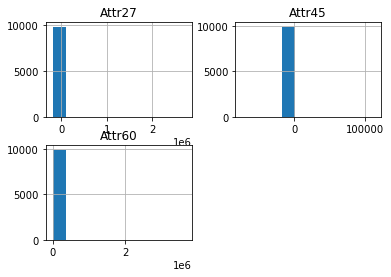

In [91]:
df.hist(column=["Attr27","Attr45","Attr60"]);

We will noticed that we have skewed plots. Remove values between the 10th and 90th percentiles.

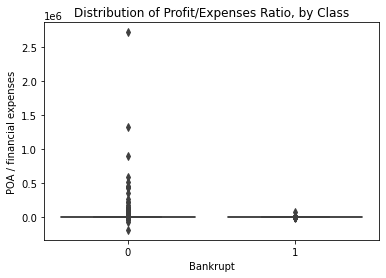

In [93]:
# Create boxplot
sns.boxplot(x="class", y="Attr27", data=df)
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

In [92]:
q1, q9 = df["Attr27"].quantile([0.1, 0.9])
mask = df["Attr27"].between(q1, q9)
mask.head()

company_id
1     True
2    False
3     True
4     True
5    False
Name: Attr27, dtype: bool

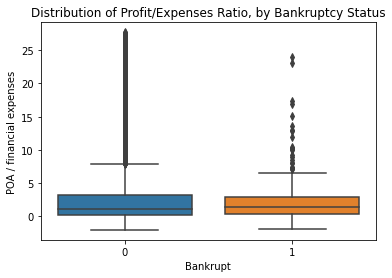

In [94]:
# Create clipped boxplot
q1, q9 = df["Attr27"].quantile([0.1, 0.9])
mask = df["Attr27"].between(q1, q9)
sns.boxplot(x="class", y="Attr27", data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

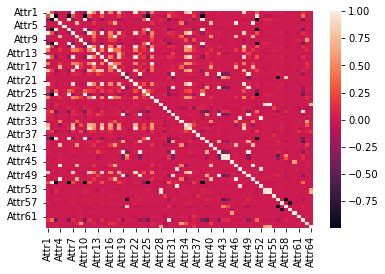

In [97]:
corr = df.drop(columns="class").corr()
sns.heatmap(corr);

First, our data is imbalanced. This is something we need to address in our data preparation. Second, many of our features have missing values that we'll need to impute during modelling. And since the features are highly skewed, the best imputation strategy is likely median, not mean. Finally, we have autocorrelation issues, which means that we should steer clear of linear models, and try a tree-based model instead.

In [98]:
target = "class"
X = df.drop(columns="class")
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10503, 64)
y shape: (10503,)


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8402, 64)
y_train shape: (8402,)
X_test shape: (2101, 64)
y_test shape: (2101,)


### Resampling

In [100]:
# Under sampling
under_sampler = RandomUnderSampler(random_state=30)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(806, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.017249,0.46463,0.326850,2.25410,22.282,0.17058,0.032244,0.91168,1.04420,0.42359,...,53896.00,0.042370,0.040719,0.95763,0.481590,5.7372,7.7719,68.841,5.3021,3.349800
1,0.060937,0.33540,0.220290,1.70650,12.664,0.00000,0.077002,1.98150,1.65510,0.66460,...,5127.40,0.049279,0.091691,0.95373,0.016969,9.9409,4.9152,68.762,5.3081,3.537300
2,-0.147400,0.01114,0.006412,1.57560,31.446,-0.16408,-0.147400,88.67400,0.19802,0.98785,...,1272.90,-4.050100,-0.149220,5.05010,0.000000,90.1740,1.1069,272.740,1.3383,0.015175
3,-0.213760,0.88495,-0.079022,0.88754,-76.643,-0.29884,-0.213760,0.13000,1.49740,0.11505,...,-356.78,-0.103960,-1.858000,1.13640,1.558100,5.9226,4.0767,171.270,2.1311,3.978300
4,-0.001760,0.34746,0.308450,1.96540,16.324,0.00000,-0.001760,1.87800,3.78700,0.65254,...,1288.60,-0.029578,-0.002697,1.00040,0.042555,28.1910,7.8294,30.793,11.8530,10.178000


In [101]:
y_train_under.value_counts(normalize=True)

0    0.5
1    0.5
Name: class, dtype: float64

In [102]:
over_sampler = RandomOverSampler(random_state=20)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(15998, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.023398,0.56276,0.148860,1.65390,-20.009,-0.09732,0.043290,0.064969,0.99036,0.036562,...,2925.1,-0.009739,0.639970,1.00970,9.165600,5.8342,8.7333,69.488,5.25270,1.91780
1,0.073618,0.32409,0.074113,1.25320,-15.833,0.21644,0.096046,1.914800,1.04910,0.620560,...,3690.5,0.046809,0.118630,0.95319,0.050563,12.3230,10.0430,69.300,5.26690,2.43490
2,0.028383,0.68503,-0.117760,0.70512,-90.166,0.14090,0.028383,0.454060,1.12010,0.311040,...,-3480.2,0.107210,0.091252,0.89279,0.918450,7.5255,24.8280,95.845,3.80820,2.11690
3,-0.313030,0.65553,-0.287560,0.53211,-190.890,-0.65866,-0.295070,0.454100,0.79752,0.297680,...,-5484.0,-0.253880,-1.051600,1.25390,0.137520,4.7836,4.4562,317.780,1.14860,1.04890
4,-0.102980,0.82083,-0.136270,0.45462,-444.800,-0.10838,-0.102960,0.217880,0.76721,0.178840,...,-53439.0,-0.303420,-0.575790,1.30340,3.192600,2.1037,2.4281,747.400,0.48836,0.13766


In [104]:
y_train_over.value_counts(normalize=True)

0    0.5
1    0.5
Name: class, dtype: float64

#### Baseline Accuracy Score

In [105]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.952


### Decision Tree Classifier

Note here that, because our classes are imbalanced, the baseline accuracy is very high. We should keep this in mind because, even if our trained model gets a high validation accuracy score, that doesn't mean it's actually *good.* 

In [106]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [107]:
# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [108]:
# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [109]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9248
Training Accuracy: 0.7572
Test Accuracy: 0.7206
Training Accuracy: 1.0
Test Accuracy: 0.9429


`model_reg` and `model_over` worked well, but their scores are below the baseline of 0.952. `model_under` has the lowest scores for both train and test data.

"Good" accuracy scores don't tell us much about the model's performance when dealing with imbalanced data. So instead of looking at what the model got right or wrong, we'll see how its predictions differ for the two classes in the dataset.

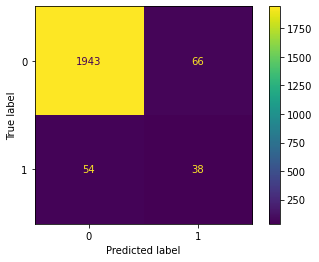

In [112]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test);

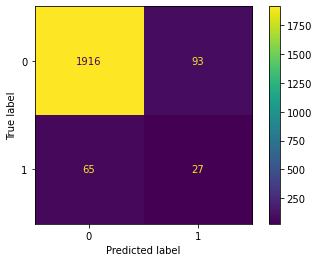

In [113]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg, X_test, y_test);

We'll notice that `model_over` has lower counts (54) of false negatives as compared to `model_reg` (65).

In [114]:
# Determine decision tree depth for `model_over`
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

29


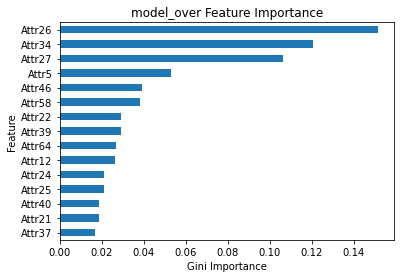

In [116]:
# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

There's our `"Attr27"` near the top, along with features 34 and 26.

In [120]:
# Save your model
with open("bankrupt_model.pkl", "wb") as f:
    pickle.dump(model_over, f)

### Random Forest Classifier

In [123]:
clf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state=42)
)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


#### Cross-validation

In [124]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.9978125  0.996875   0.9990625  0.99843701 0.99624883]


#### Hyperparameter grid search

In [125]:
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "randomforestclassifier__n_estimators": range(25,100, 25),
    "randomforestclassifier__max_depth": range(10, 50, 10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [126]:
model = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1, verbose=1)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [127]:
# Train model
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [128]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.377040,0.024713,0.065326,0.012994,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.980313,0.976250,0.982500,0.972804,0.972491,0.976872,0.003991,21
1,3.276702,0.434026,0.051848,0.007237,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.966250,0.970313,0.972500,0.969053,0.967177,0.969059,0.002229,24
2,5.152264,0.041295,0.071764,0.007117,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.978125,0.975625,0.983750,0.980306,0.974680,0.978497,0.003281,20
3,4.872722,0.334155,0.051975,0.008215,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.970313,0.970938,0.975313,0.975305,0.969678,0.972309,0.002481,23
4,6.469495,0.033749,0.070869,0.001837,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.980000,0.975625,0.982187,0.982182,0.975617,0.979122,0.002968,19
5,6.646223,0.046320,0.080557,0.004952,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.973750,0.973437,0.975625,0.978743,0.970616,0.974434,0.002684,22
6,2.564867,0.026167,0.033908,0.001430,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.996563,0.994375,0.996563,0.996874,0.996249,0.996125,0.000897,18
7,2.890934,0.076398,0.039402,0.005428,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.997500,0.995625,0.997188,0.998124,0.994061,0.996500,0.001472,17
8,5.417086,0.079255,0.063765,0.005711,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.997188,0.995313,0.997500,0.997187,0.995624,0.996562,0.000906,16
9,5.480392,0.050503,0.060911,0.003954,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.997812,0.996250,0.997188,0.998124,0.996249,0.997125,0.000776,12


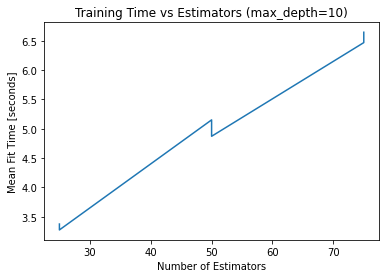

In [129]:
# Create mask
mask = cv_results["param_randomforestclassifier__max_depth"] == 10
# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]["param_randomforestclassifier__n_estimators"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

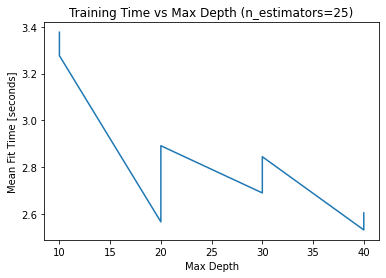

In [130]:
# Create mask
mask = cv_results["param_randomforestclassifier__n_estimators"] == 25
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]["param_randomforestclassifier__max_depth"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [131]:
cv_results[mask][["mean_fit_time", "param_randomforestclassifier__max_depth", "param_simpleimputer__strategy"]]

,mean_fit_time,param_randomforestclassifier__max_depth,param_simpleimputer__strategy
0,3.377040,10,mean
1,3.276702,10,median
6,2.564867,20,mean
7,2.890934,20,median
12,2.688771,30,mean
13,2.843939,30,median
18,2.530394,40,mean
19,2.603110,40,median


Looks like the mean took lesser time to compute than the median did.

In [132]:
model.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 75,
 'simpleimputer__strategy': 'median'}

In [133]:
model.best_score_

0.9979997850890904

In [134]:
# to extract the best performing model
model.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=40, n_estimators=75,
                                        random_state=42))])

In [135]:
acc_train = model.score(X_train_over, y_train_over)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9543


In [136]:
y_test.value_counts()

0    2009
1      92
Name: class, dtype: int64

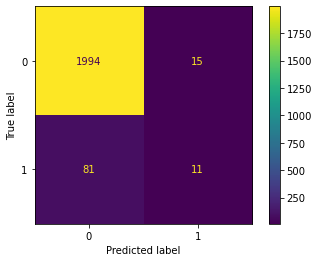

In [137]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

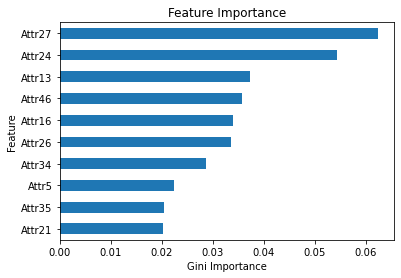

In [138]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [139]:
# Save model
with open("bankrupt_model_rf.pkl", "wb") as f:
    pickle.dump(model, f)

In [140]:
def make_predictions(data_filepath, model_filepath):
    # Wrangle JSON file
    X_test = wrangle(data_filepath)
    # Load model
    with open(model_filepath, "rb") as f:
        loaded_model = pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "bankrupt", and same index as X_test
    y_test_pred = pd.Series(y_test_pred, index=X_test.index, name="bankrupt")
    return y_test_pred